In [230]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

ipca = pd.read_csv('files/indice.csv')

ipca.head()

,Unnamed: 0,Jan,Fev,Mar,Abr,Mai,Jun,Jul,Ago,Set,Out,Nov,Dez,Ano
0,2025,"0,16%","1,31%",--,--,--,--,--,--,--,--,--,--,"1,47%"
1,2024,"0,42%","0,83%","0,16%","0,38%","0,46%","0,21%","0,38%","-0,02%","0,44%","0,56%","0,39%","0,52%","4,83%"
2,2023,"0,53%","0,84%","0,71%","0,61%","0,23%","-0,08%","0,12%","0,23%","0,26%","0,24%","0,28%","0,56%","4,62%"
3,2022,"0,54%","1,01%","1,62%","1,06%","0,47%","0,67%","-0,68%","-0,36%","-0,29%","0,59%","0,41%","0,62%","5,78%"
4,2021,"0,25%","0,86%","0,93%","0,31%","0,83%","0,53%","0,96%","0,87%","1,16%","1,25%","0,95%","0,73%","10,06%"


## Renomeando colunas para facilitar o entendimento

In [231]:
ipca.rename(columns={"Ano": "Variação Anual (%)", "Unnamed: 0": "Ano"}, inplace=True)
ipca = ipca[ipca['Ano'] < 2025].reset_index(drop=True) # Os valores de 2025 ainda não estão atualizados. Vamos removê-los
ipca.head()

,Ano,Jan,Fev,Mar,Abr,Mai,Jun,Jul,Ago,Set,Out,Nov,Dez,Variação Anual (%)
0,2024,"0,42%","0,83%","0,16%","0,38%","0,46%","0,21%","0,38%","-0,02%","0,44%","0,56%","0,39%","0,52%","4,83%"
1,2023,"0,53%","0,84%","0,71%","0,61%","0,23%","-0,08%","0,12%","0,23%","0,26%","0,24%","0,28%","0,56%","4,62%"
2,2022,"0,54%","1,01%","1,62%","1,06%","0,47%","0,67%","-0,68%","-0,36%","-0,29%","0,59%","0,41%","0,62%","5,78%"
3,2021,"0,25%","0,86%","0,93%","0,31%","0,83%","0,53%","0,96%","0,87%","1,16%","1,25%","0,95%","0,73%","10,06%"
4,2020,"0,21%","0,25%","0,07%","-0,31%","-0,38%","0,26%","0,36%","0,24%","0,64%","0,86%","0,89%","1,35%","4,52%"


## Alterando os tipos de dados
### Atualmente, nossos dados estão como string, ou obj

In [232]:
ipca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Ano                 25 non-null     int64 
 1   Jan                 25 non-null     object
 2   Fev                 25 non-null     object
 3   Mar                 25 non-null     object
 4   Abr                 25 non-null     object
 5   Mai                 25 non-null     object
 6   Jun                 25 non-null     object
 7   Jul                 25 non-null     object
 8   Ago                 25 non-null     object
 9   Set                 25 non-null     object
 10  Out                 25 non-null     object
 11  Nov                 25 non-null     object
 12  Dez                 25 non-null     object
 13  Variação Anual (%)  25 non-null     object
dtypes: int64(1), object(13)
memory usage: 2.9+ KB


In [233]:

for column in ipca.columns[1:]: # não vamos mexer na coluna "Ano"
    ipca[column] = ipca[column]\
        .str.replace(',', '.')\
        .str.replace('%', '')\
        .astype('float64')

ipca.head()

,Ano,Jan,Fev,Mar,Abr,Mai,Jun,Jul,Ago,Set,Out,Nov,Dez,Variação Anual (%)
0,2024,0.42,0.83,0.16,0.38,0.46,0.21,0.38,-0.02,0.44,0.56,0.39,0.52,4.83
1,2023,0.53,0.84,0.71,0.61,0.23,-0.08,0.12,0.23,0.26,0.24,0.28,0.56,4.62
2,2022,0.54,1.01,1.62,1.06,0.47,0.67,-0.68,-0.36,-0.29,0.59,0.41,0.62,5.78
3,2021,0.25,0.86,0.93,0.31,0.83,0.53,0.96,0.87,1.16,1.25,0.95,0.73,10.06
4,2020,0.21,0.25,0.07,-0.31,-0.38,0.26,0.36,0.24,0.64,0.86,0.89,1.35,4.52


## Organizando os dados de acordo com a data

In [234]:
months_dict = { # Vamos usar esse dicionário para mapear os nomes dos meses em numerais
    'Jan': '01', 'Fev': '02', 'Mar': '03', 'Abr': '04',
    'Mai': '05', 'Jun': '06', 'Jul': '07', 'Ago': '08',
    'Set': '09', 'Out': '10', 'Nov': '11', 'Dez': '12'
}

# O dataframe vai se expandir apenas na vertical, deixando de lado o uso das colunas referentes aos meses
# Cada linha representará o ano e o mês
ipca_cleaned = pd.melt(
    ipca.drop(columns=['Variação Anual (%)']),
    id_vars=['Ano'],
    var_name='month',
    value_name='inflacao'
    )

ipca_cleaned['ano_mes'] = ipca_cleaned['Ano'].astype(str) + '-' + ipca_cleaned['month'].map(months_dict)
# Filtrando os dados necessários desse novo df
ipca_cleaned = ipca_cleaned[['ano_mes', 'inflacao']]

ipca_cleaned['ano_mes'] = pd.to_datetime(ipca_cleaned['ano_mes'], format='%Y-%m')
ipca_cleaned = ipca_cleaned.sort_values(by='ano_mes').reset_index(drop=True)

ipca_cleaned.head(20)

,ano_mes,inflacao
0,2000-01-01,0.62
1,2000-02-01,0.13
2,2000-03-01,0.22
3,2000-04-01,0.42
4,2000-05-01,0.01
5,2000-06-01,0.23
6,2000-07-01,1.61
7,2000-08-01,1.31
8,2000-09-01,0.23
9,2000-10-01,0.14


## Criando o produto cumulativo (inflação sobre inflação)

In [235]:
ipca_cleaned['inflacao_acumulada'] = ((1+ ipca_cleaned['inflacao'] / 100).cumprod() - 1) * 100
ipca_cleaned

,ano_mes,inflacao,inflacao_acumulada
0,2000-01-01,0.62,0.620000
1,2000-02-01,0.13,0.750806
2,2000-03-01,0.22,0.972458
3,2000-04-01,0.42,1.396542
4,2000-05-01,0.01,1.406682
...,...,...,...
295,2024-08-01,-0.02,338.545254
296,2024-09-01,0.44,340.474853
297,2024-10-01,0.56,342.941512
298,2024-11-01,0.39,344.668984


## Criando nosso gráfico

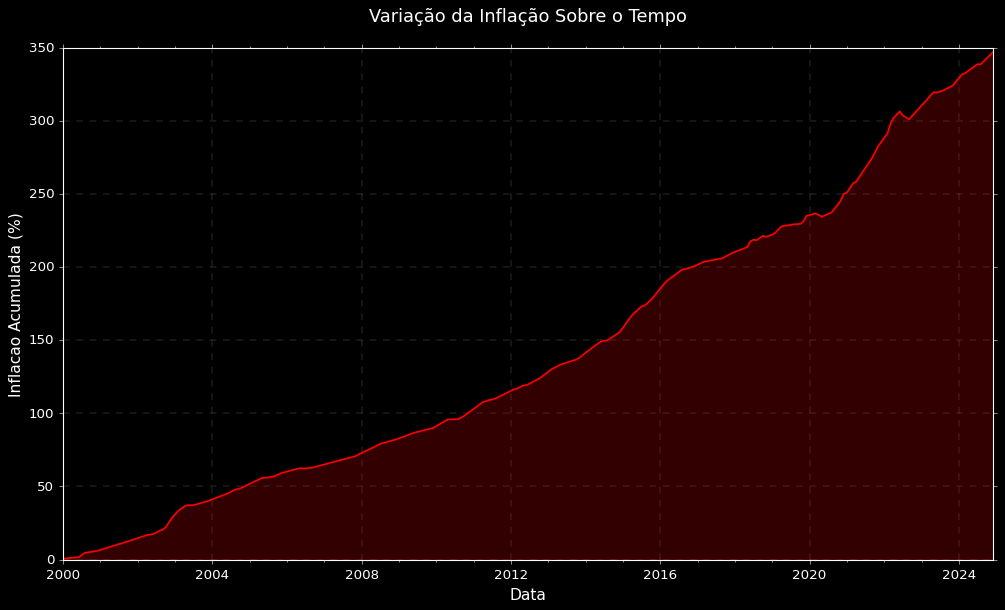

In [243]:
plt.style.use('dark_background')
plt.figure(figsize=(15, 8))

sns.lineplot(data=ipca_cleaned, x='ano_mes', y='inflacao_acumulada', color='red', linewidth=1.5)
plt.fill_between(ipca_cleaned['ano_mes'], ipca_cleaned['inflacao_acumulada'], color='red', alpha=0.2)

locator = mdates.YearLocator()
formatter = mdates.DateFormatter('%Y')
plt.gca().xaxis.set_major_locator(locator)
plt.gca().xaxis.set_major_formatter(formatter)
plt.gca().xaxis.set_minor_locator(mdates.YearLocator(1))

ticks = plt.gca().get_xticks()
ticks_filtered = [tick for tick in ticks if pd.Timestamp(mdates.num2date(tick)).year % 4 == 0]
plt.gca().set_xticks(ticks_filtered)

plt.grid(color='white', linestyle='--', linewidth=0.3, alpha=.5)
plt.tick_params(color='white')

plt.xlabel('Data', fontsize=14, color='white')
plt.ylabel('Inflacao Acumulada (%)', fontsize=14, color='white')
plt.title('Variação da Inflação Sobre o Tempo\n', fontsize=16, color='white')
plt.show()

In [237]:
ipca

,Ano,Jan,Fev,Mar,Abr,Mai,Jun,Jul,Ago,Set,Out,Nov,Dez,Variação Anual (%)
0,2024,0.42,0.83,0.16,0.38,0.46,0.21,0.38,-0.02,0.44,0.56,0.39,0.52,4.83
1,2023,0.53,0.84,0.71,0.61,0.23,-0.08,0.12,0.23,0.26,0.24,0.28,0.56,4.62
2,2022,0.54,1.01,1.62,1.06,0.47,0.67,-0.68,-0.36,-0.29,0.59,0.41,0.62,5.78
3,2021,0.25,0.86,0.93,0.31,0.83,0.53,0.96,0.87,1.16,1.25,0.95,0.73,10.06
4,2020,0.21,0.25,0.07,-0.31,-0.38,0.26,0.36,0.24,0.64,0.86,0.89,1.35,4.52
5,2019,0.32,0.43,0.75,0.57,0.13,0.01,0.19,0.11,-0.04,0.10,0.51,1.15,4.31
6,2018,0.29,0.32,0.09,0.22,0.40,1.26,0.33,-0.09,0.48,0.45,-0.21,0.15,3.75
7,2017,0.38,0.33,0.25,0.14,0.31,-0.23,0.24,0.19,0.16,0.42,0.28,0.44,2.95
8,2016,1.27,0.90,0.43,0.61,0.78,0.35,0.52,0.44,0.08,0.26,0.18,0.30,6.29
9,2015,1.24,1.22,1.32,0.71,0.74,0.79,0.62,0.22,0.54,0.82,1.01,0.96,10.67


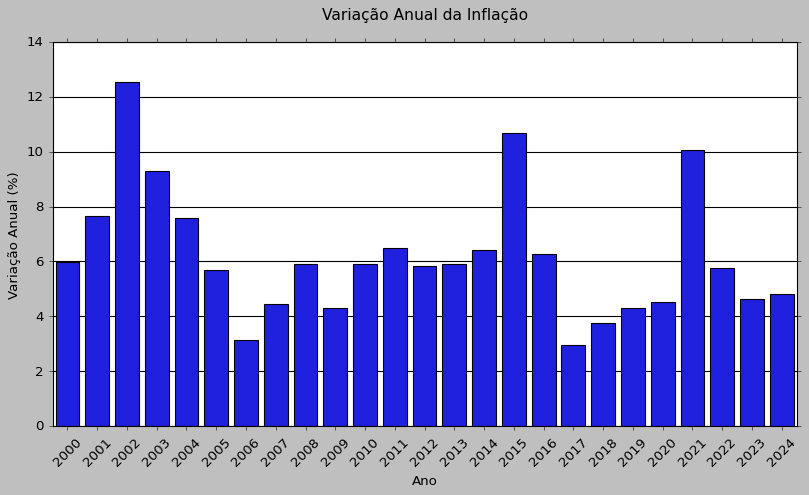

In [238]:
plt.style.use('grayscale')
plt.figure(figsize=(12, 6))

sns.barplot(data=ipca, x="Ano", y="Variação Anual (%)", color="blue")

plt.xlabel("Ano", fontsize=12)
plt.ylabel("Variação Anual (%)", fontsize=12)
plt.title("Variação Anual da Inflação\n", fontsize=14)

plt.xticks(rotation=45)

plt.show()